In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class LinearReg():

    def __init__(self, x, y):
        from sklearn.linear_model import LinearRegression

        self.lr_model = LinearRegression()

        self.x = x.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

        self.lr_model.fit(self.x, self.y)

        self.rr = self.lr_model.score(self.x, self.y)

    def get_fitted_line(self):
        return [self.x, self.lr_model.predict(self.x)]

    def get_coefficients(self):
        return self.lr_model.coef_[0, 0], self.lr_model.intercept_[0]

    def get_score(self, x=0, y=0):
        if x == 0 or y == 0:
            return self.rr
        else:
            return self.lr_model.score(x, y)

    def print_coefficients(self):
        print('Gain: {0:1.2f}, Bias: {1:1.2f}, , r^2: {2:1.2f}'.format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr))
        return ('Gain: {0:1.2f},\nBias: {1:1.2f},\n' + r'$r^2$: {2:1.2f}').format(self.lr_model.coef_[0, 0], self.lr_model.intercept_[0], self.rr)





In [2]:
import seaborn as sns
import matplotlib as mpl
    # 21 defines the number of sound types

plt.style.use('seaborn-whitegrid')

drawing_size = 15
box_frame = True
    
mpl.rcParams['grid.linestyle'] = ':'

mpl.rcParams['font.size'] = drawing_size
mpl.rcParams['font.style'] = 'normal'
# mpl.rcParams['font.family'] = ['Symbol']

mpl.rcParams['figure.titlesize'] = int(drawing_size * 1.3)

mpl.rcParams['lines.linewidth'] = int(drawing_size / 5)

mpl.rcParams['axes.labelsize'] = drawing_size
mpl.rcParams['axes.titlesize'] = int(drawing_size * 1.3)
mpl.rcParams['xtick.labelsize'] = int(drawing_size * 1)
mpl.rcParams['ytick.labelsize'] = int(drawing_size * 1)

if box_frame:
    mpl.rcParams['legend.fancybox'] = True
    mpl.rcParams['legend.fontsize'] = int(drawing_size * 1)
    mpl.rcParams['legend.frameon'] = True
    mpl.rcParams['legend.framealpha'] = 0.5
else:
    mpl.rcParams['legend.fancybox'] = False
    mpl.rcParams['legend.fontsize'] = int(drawing_size * 1)
    mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.facecolor'] = 'inherit'
mpl.rcParams['legend.edgecolor'] = '0.8'

mpl.rcParams['figure.figsize'] = [20.0, 10.0]
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 400
mpl.rcParams['image.cmap'] = 'viridis'

In [3]:
path = 'results/userid_00_date_20.11.2020_time_14.19.csv'
df = pd.read_csv(path,)

# TODO change the calucation of the user estimate
# use real values for max and deg

# df.user_estimate = (125 - df.user_estimate.values)/125   * 10
# convert line numbers to degree
df.line_number = 135 - (df.line_number.values   * 12.25)
# df.head()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

     trial  line_number  user_estimate sound_type condition  reaction_time  \
0        0       110.50        42.7485    rippled      mono      43.639228   
1        1       135.00        94.7055    rippled      mono       2.367413   
2        2       110.50        71.1720      white      mono       1.170894   
3        3        61.50        39.8985    rippled      mono       1.134366   
4        4        73.75        46.0605      white      mono       1.201919   
5        5        98.25        67.2720      white      mono       1.203520   
6        6       110.50        77.3160      white      mono       1.319165   
7        7       110.50        67.4430    rippled      mono       1.233885   
8        8        24.75        48.0435    rippled      mono       1.255646   
9        9        49.25        37.6920      white      mono       1.450771   
10      10        73.75        49.4115      white      mono       1.718051   
11      11       135.00        78.4965    rippled      mono     

Gain: 0.83, Bias: 1.17, , r^2: 0.94
Gain: 0.75, Bias: 5.44, , r^2: 0.82
Gain: 0.79, Bias: 4.31, , r^2: 0.94
Gain: 0.46, Bias: 30.76, , r^2: 0.47


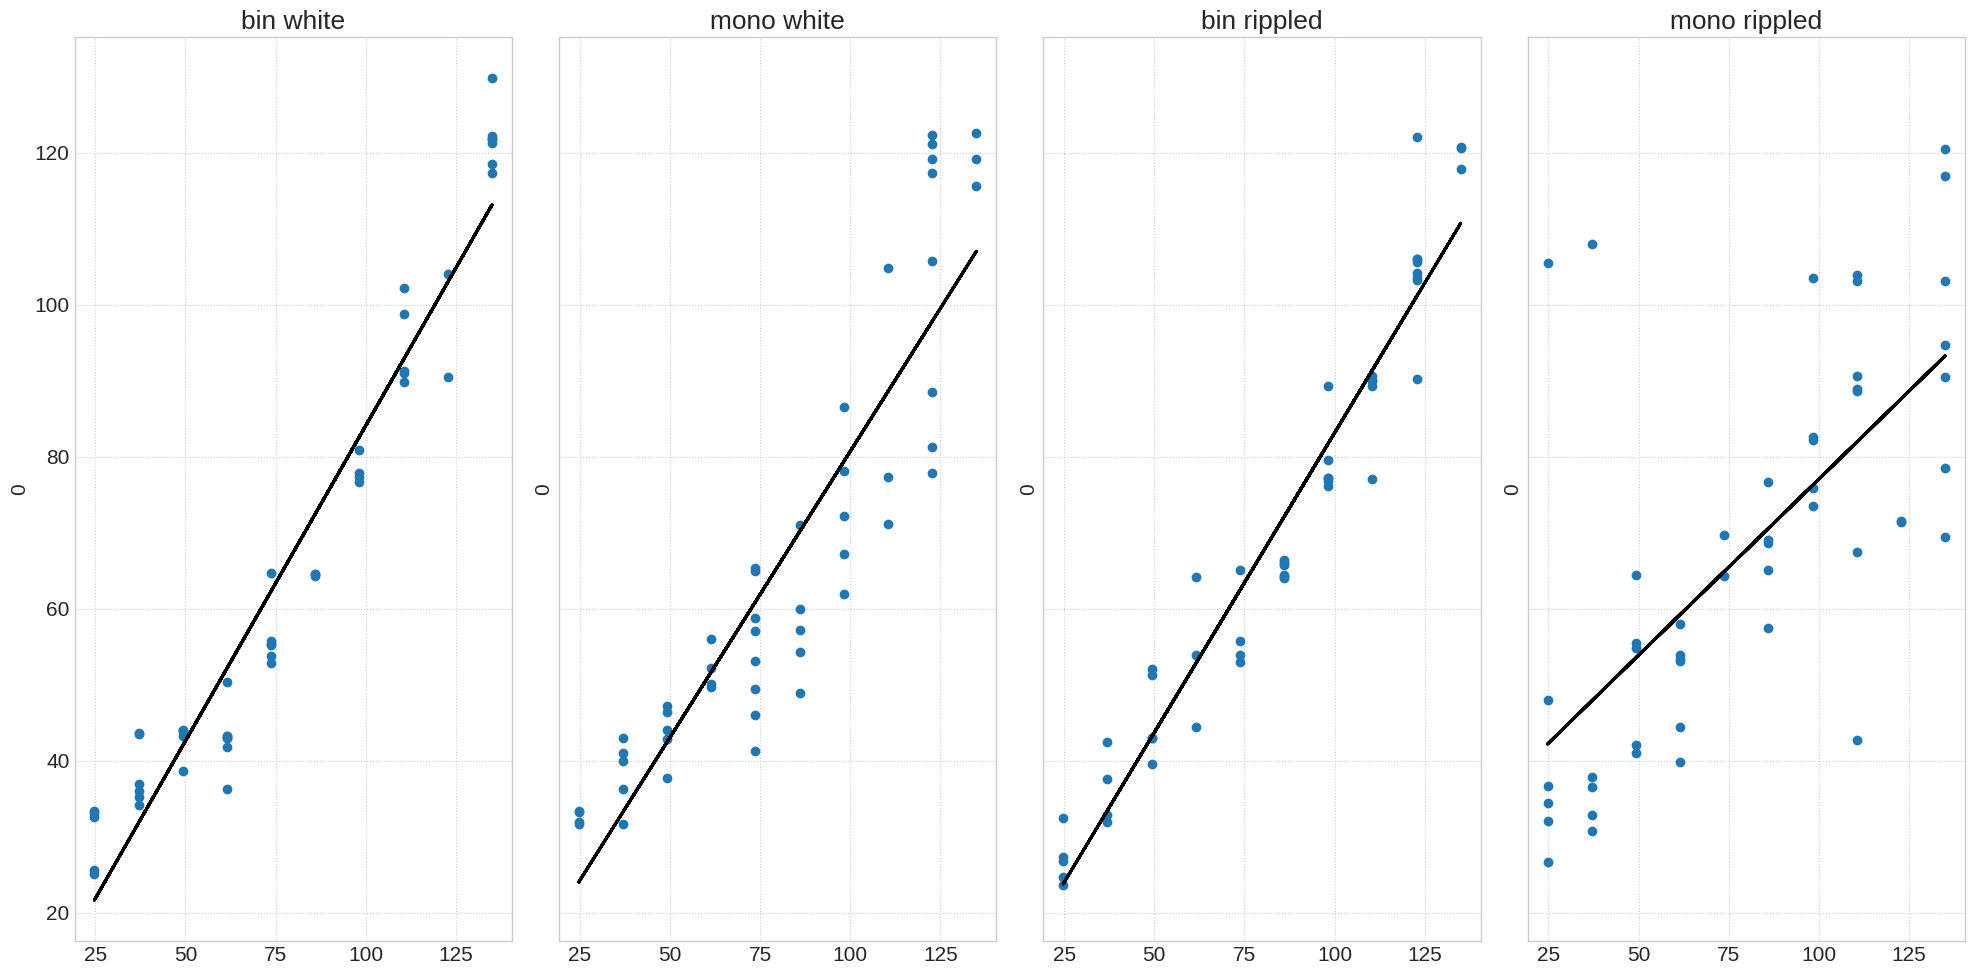

In [4]:



users = np.unique(df.user_id)
stimuli = np.unique(df.condition)
noise_types = np.unique(df.sound_type)

user = '03charlotte'
stimulus = 'white'
perception = 'binaural'

fig = plt.figure(figsize=(20,10))
axes = fig.subplots(users.shape[0],4,squeeze=False,sharex=True,sharey=True)

lin_reg_results = np.zeros((len(users),4,3))

for i_user,user in enumerate(users):
    
    for i_noise,noise in enumerate(noise_types[::-1]):

        for i_stimulus,stimulus in enumerate(stimuli):
                    
            ax = axes[i_user,(i_noise * len(stimuli)) + i_stimulus]

            if i_user == 0:
                ax.set_title(stimulus+' '+noise)
                
            ax.set_ylabel(user)
        
            df_ = df[ (df['condition'] == stimulus) & (df['sound_type'] == noise) & (df['user_id'] == user)]

            perc = df_.user_estimate
            outp = df_.line_number
            lr = LinearReg(outp.values,perc.values)            
            g,b = lr.get_coefficients()
            s = lr.get_score()
            lin_reg_results[i_user,(i_noise * len(stimuli)) + i_stimulus, :] = [g,b,s] 
            lr.print_coefficients()

            [x,y] = lr.get_fitted_line()
            ax.plot(x,y,color='black',linewidth=2)
            ax.scatter(outp,perc)


plt.tight_layout()
plt.show()

## Read all data into one data frame

In [11]:
SOUND_FILES

[PosixPath('/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_01_date_20.11.2020_time_15.10.csv'),
 PosixPath('/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_00_date_20.11.2020_time_14.19.csv')]

In [16]:
from pathlib import Path

# ROOT = parents[2]
# set the path to the sound files
SOUND_FILES = Path('.').resolve() / 'results'
# create a list of the sound files
SOUND_FILES = list(SOUND_FILES.glob('**/*.csv'))

dfs = []

for i in SOUND_FILES:
    print(i)
    df = pd.read_csv(i.resolve(),)
    df.line_number = 135 - (df.line_number.values   * 12.25)
    
    dfs.append(df)

    # TODO change the calucation of the user estimate
# use real values for max and deg

# df.user_estimate = (125 - df.user_estimate.values)/125   * 10
# convert line numbers to degree
# df.head()
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(df)

/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_01_date_20.11.2020_time_15.10.csv
/home/oesst/ownCloud/PhD/Code/Python/vertical_localization_exp/results/userid_00_date_20.11.2020_time_14.19.csv


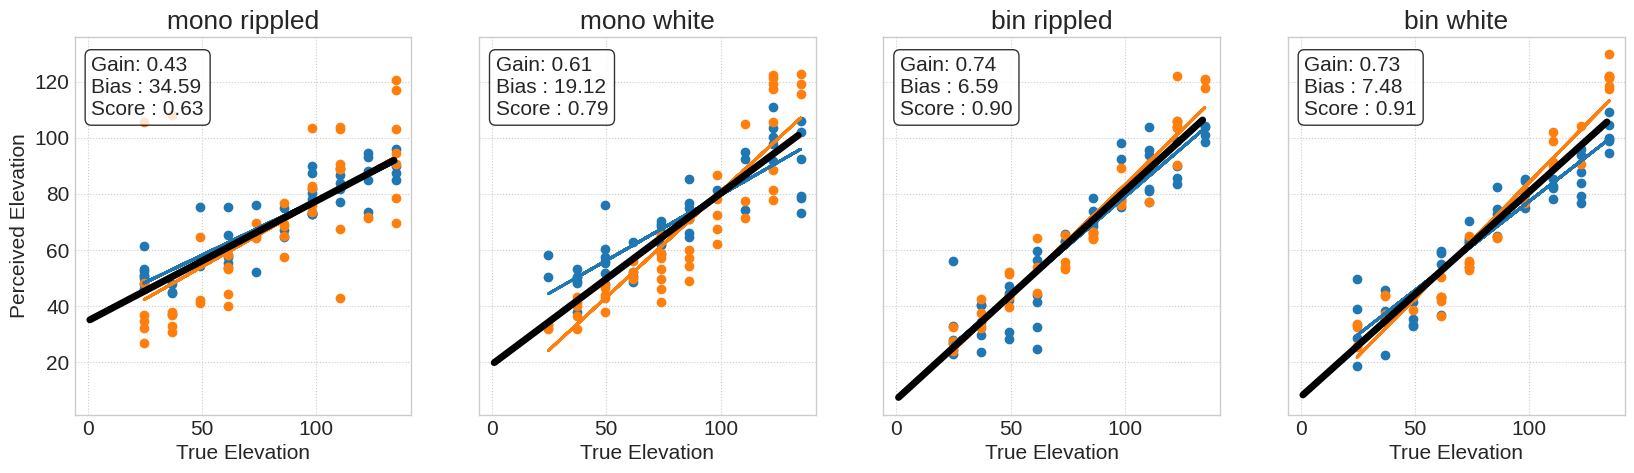

In [50]:


conditions = ['mono','bin']

noise_types = ['white','rippled']


fig = plt.figure(figsize=(20,5))
axes = fig.subplots(1,4,squeeze=False,sharex=True,sharey=True)

lin_reg_results = np.zeros((len(dfs),4,3))


        
for i_condition,condition in enumerate(conditions):

    for i_noise,noise in enumerate(noise_types[::-1]):
        
        for i_df,df in enumerate(dfs):
            
            ax_num = ( i_condition * len(conditions)) + i_noise
                    
            ax = axes[0,ax_num]

            
            if i_df == 0:
                ax.set_title(condition+' '+noise)
#                 print(condition,noise,ax_num)

                
#             ax.set_ylabel(user)
        
            df_ = df[ (df['condition'] == condition) & (df['sound_type'] == noise)]

            perc = df_.user_estimate
            outp = df_.line_number
            
#             print(perc.values)
            
            lr = LinearReg(outp.values,perc.values)            
            g,b = lr.get_coefficients()
            s = lr.get_score()
            lin_reg_results[i_df,ax_num, :] = [g,b,s] 

            [x,y] = lr.get_fitted_line()
            ax.plot(x,y,linewidth=2)
            ax.scatter(outp,perc)

means = lin_reg_results.mean(0)
x = np.arange(1,135)

ax = axes[0,0]
ax.plot(x,x*means[0,0]+means[0,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[0,0],means[0,1],means[0,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_ylabel('Perceived Elevation')
ax.set_xlabel('True Elevation')


ax = axes[0,1]
ax.plot(x,x*means[1,0]+means[1,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[1,0],means[1,1],means[1,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation')

ax = axes[0,2]
ax.plot(x,x*means[2,0]+means[2,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[2,0],means[2,1],means[2,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation')

ax = axes[0,3]
ax.plot(x,x*means[3,0]+means[3,1],color='black',linewidth=5)
text_str = 'Gain: {0:1.2f}\nBias : {1:1.2f}\nScore : {2:1.2f}'.format(means[3,0],means[3,1],means[3,2])
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, verticalalignment='top', bbox=props)
ax.set_xlabel('True Elevation')


plt.savefig('results_all.svg', dpi=300, bbox_inches='tight')
plt.savefig('results_all.png', dpi=300, bbox_inches='tight')

# plt.tight_layout()
plt.show()

# print('Mono Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[0,0],means[0,1],means[0,2]))
# print('Mono White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[1,0],means[1,1],means[1,2]))
# print('Bina Rippled Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[2,0],means[2,1],means[2,2]))
# print('Bina White N Mean Gain: {0:1.3f},  Bias : {1:1.3f},  Score : {1:1.3f}'.format(means[3,0],means[3,1],means[3,2]))



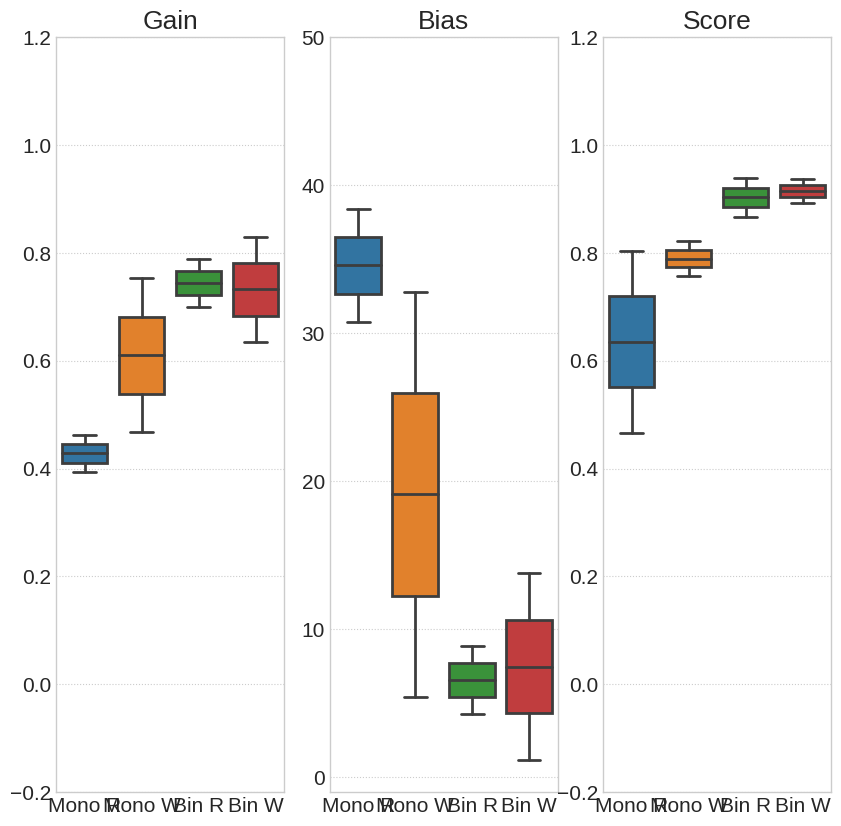

In [52]:
            
fig = plt.figure(figsize=(10,10))

axes = fig.subplots(1,3,squeeze=False,sharex=True)

ax = axes[0,0]
ax.set_title('Gain')
sns.boxplot(data=lin_reg_results[:,:,0],showfliers=True, ax=ax, linewidth=2)
ax.set_ylim(-0.2,1.2)

ax = axes[0,1]
ax.set_title('Bias')
sns.boxplot(data=lin_reg_results[:,:,1],showfliers=True, ax=ax, linewidth=2)
ax.set_ylim(-1,50)

ax = axes[0,2]
ax.set_title('Score')
sns.boxplot(data=lin_reg_results[:,:,2],showfliers=True, ax=ax, linewidth=2)
ax.set_ylim(-0.2,1.2)

ax.set_xticklabels(['Mono R', 'Mono W', 'Bin R', 'Bin W'])


plt.show()

## Learning

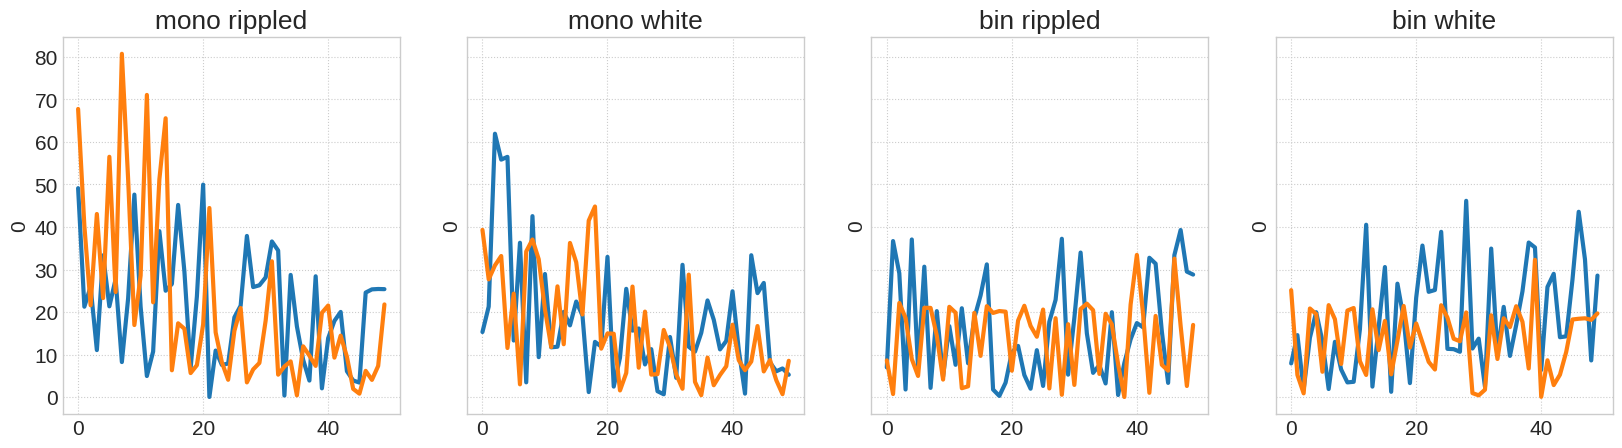

In [59]:
conditions = ['mono','bin']

noise_types = ['white','rippled']


fig = plt.figure(figsize=(20,5))
axes = fig.subplots(1,4,squeeze=False,sharex=True,sharey=True)

lin_reg_results = np.zeros((len(dfs),4,3))

errors = np.zeros((len(users),4,50))

        
for i_condition,condition in enumerate(conditions):

    for i_noise,noise in enumerate(noise_types[::-1]):
        
        for i_df,df in enumerate(dfs):
            
            ax_num = ( i_condition * len(conditions)) + i_noise
                    
            ax = axes[0,ax_num]

            
            if i_df == 0:
                ax.set_title(condition+' '+noise)
#                 print(condition,noise,ax_num)

                

            ax.set_ylabel(df.user_id.values[0])
            
            
        
            df_ = df[ (df['condition'] == condition) & (df['sound_type'] == noise)]

            perc = df_.user_estimate
            outp = df_.line_number
            errors[i_user,ax_num] = perc-outp
            
            ax.plot(np.arange(0,len(perc)),(perc-outp).abs())
            
#             lr = LinearReg(outp.values,perc.values)            
#             g,b = lr.get_coefficients()
#             s = lr.get_score()

#             [x,y] = lr.get_fitted_line()


